In [8]:
import os, sys
from pathlib import Path
import json

WORK_DIR = Path.cwd().parent

sys.path.append(str(WORK_DIR / "src"))

import graph_gen
import ollama_manager


In [9]:
CVRR_DIR = Path("/multiverse/datasets/shared/cvrr_challange25/val")
VIDEO_DIR = WORK_DIR / "data/datasets/action-genome/Charades_v1_480"
video_ids = [{'video_id': "0A8CF"}]
video_path = VIDEO_DIR / "0A8CF.mp4"


In [10]:
print(video_path)


/home/lusha/star_code/data/datasets/action-genome/Charades_v1_480/0A8CF.mp4


Extracted frame at 0.10s: ./frame_0000.jpg
Extracted frame at 3.58s: ./frame_0001.jpg
Extracted frame at 7.16s: ./frame_0002.jpg


Extracted frame at 10.74s: ./frame_0003.jpg
Extracted frame at 14.32s: ./frame_0004.jpg
Extracted frame at 17.91s: ./frame_0005.jpg
Extracted frame at 21.49s: ./frame_0006.jpg
Extracted frame at 25.07s: ./frame_0007.jpg
Extracted frame at 28.65s: ./frame_0008.jpg
Extracted frame at 32.13s: ./frame_0009.jpg


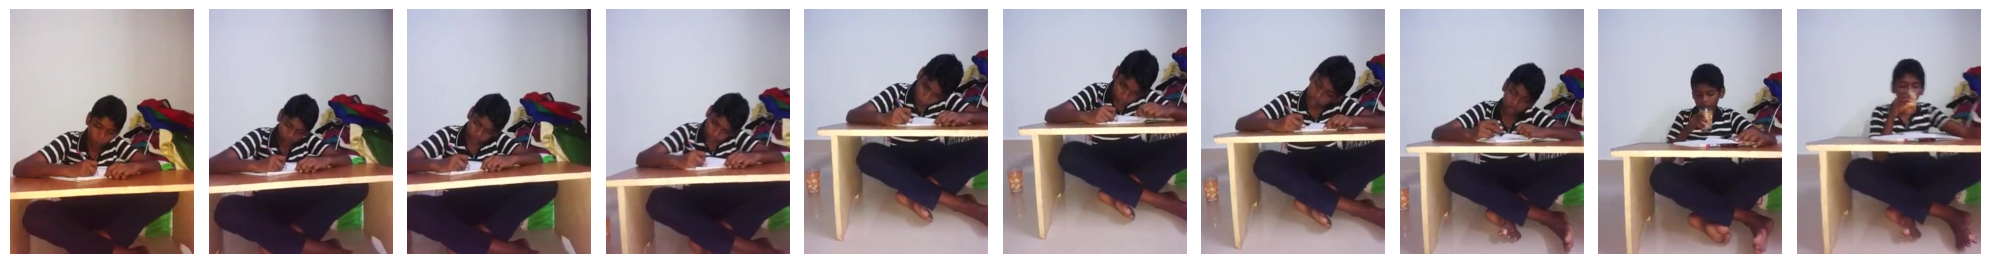

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

frame_dir, frame_paths = graph_gen.extract_frames(video_path, 10, output_dir=".")
images = frame_paths
fig, axes = plt.subplots(1,  len(images), figsize=(20, 12))

for ax, img_path in zip(axes, images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [12]:
video_encodings = list(frames for frames in graph_gen.generate_frames(VIDEO_DIR, video_ids))
len(video_encodings)


Extracted frame at 0.10s: /tmp/tmp2_r0am8d/frame_0000.jpg
Extracted frame at 3.58s: /tmp/tmp2_r0am8d/frame_0001.jpg
Extracted frame at 7.16s: /tmp/tmp2_r0am8d/frame_0002.jpg
Extracted frame at 10.74s: /tmp/tmp2_r0am8d/frame_0003.jpg
Extracted frame at 14.32s: /tmp/tmp2_r0am8d/frame_0004.jpg
Extracted frame at 17.91s: /tmp/tmp2_r0am8d/frame_0005.jpg
Extracted frame at 21.49s: /tmp/tmp2_r0am8d/frame_0006.jpg
Extracted frame at 25.07s: /tmp/tmp2_r0am8d/frame_0007.jpg
Extracted frame at 28.65s: /tmp/tmp2_r0am8d/frame_0008.jpg
Extracted frame at 32.13s: /tmp/tmp2_r0am8d/frame_0009.jpg


1

In [13]:
video_encodings[0]


{'video_id': '0A8CF',
 'frames': [{'frame_id': 0,
   'encoding': '/9j/4AAQSkZJRgABAgAAAQABAAD//gAQTGF2YzU4LjkxLjEwMAD/2wBDAAgEBAQEBAUFBQUFBQYGBgYGBgYGBgYGBgYHBwcICAgHBwcGBgcHCAgICAkJCQgICAgJCQoKCgwMCwsODg4RERT/xACwAAACAgMBAQAAAAAAAAAAAAAAAQMCBgUEBwgBAAMBAQEBAAAAAAAAAAAAAAABAgMEBQYQAAEDAgQDBQQHBQQHBwUBAAEAAgMEERIxIQVBBwZhcSJREzKBFJFSsULRCHKhYjPBFSNDgiQWU4OSF8JjRbKik/A04VTSJkRVhHMRAAIBAwMEAQMCBQUBAQEAAAABAhEEAxIxIVETBUEUMiJhQlJikXEVBqGxgSMWcvDR/8AAEQgB4AFoAwEiAAIRAAMRAP/aAAwDAQACEQMRAD8A9DYTZXCVkwrKAKyVk0ANXCorhS9wBCaEAIJhCAgBoQhAAhCEMAQhCQAhCEDApFMpFACSTSQORQpKySBFCqOUhCjKAW5RIq1lUpAtyF+aieNVM8KOQIqUQyZKOymKrYJARlVUpAsqWSGUKoc1IQqHNMCqpIrqrhdAETlWyuWpWSHEpJkonaqaTJQ2zU+x6U9yKRRSKZ6ie1WJLkiQrYUYUFmeJosgBa1MBphACsAlUQhmrgIsmkMEJ2QioDsiyEIASAnogWSECE9EaIGJCaSBCsiyaEDFZCaLIApZIq9lUhAFXZJJlJAFXKNykcqOBSAokQnZBSHHYieoZAp35KNwQUQFVUkgVLJDKqpV7KpGiAKEKuAZqRVKVWIjsFRylVSLpVYEJVCNVI4WVbaoq31GiNwUTxZTkKORqB1OdwUbwp3NUbwqTGmRWRhKtZNBdYmcphJMBaHNQeFMITSFQYTCQTCBjQhACAGhWwpYQgBITwhGEIEGFGFNCBCwhIhWQg

In [14]:
sys_file_path = WORK_DIR / "data/prompts/graph_gen/system_prompt.txt"

sys_prompt = graph_gen._load_prompt_fromfile(sys_file_path)
# model_options = _load_model_options()
ollama_params = {
    "model": "gemma3:4b",
    "system": sys_prompt,
    "stream": True,
    "options": {
        "num_ctx": 10240,
        "temperature": 0.1,
        "num_predict": 1024,
        "seed": 42,
    },
}

url = os.environ.get("OLLAMA_URL", "http://localhost:11435")
client = ollama_manager.OllamaRequestManager(url, ollama_params)


In [15]:
client.generate_completion("hello")


Hello there! I'm ready to put my scene graph analysis skills to work. Please provide me with an image, and I’ll do my best to break it down into a structured scene graph. Let’s see what we can discover! 

To help me give you the most useful analysis, could you also tell me:

*   **What kind of image are you providing?** (e.g., a photograph, a painting, a screenshot)
*   **Is there anything specific you're particularly interested in analyzing?** (e.g., the composition, the activities depicted, the relationships between specific objects)

Response at: 36.8 tk/s


"Hello there! I'm ready to put my scene graph analysis skills to work. Please provide me with an image, and I’ll do my best to break it down into a structured scene graph. Let’s see what we can discover! \n\nTo help me give you the most useful analysis, could you also tell me:\n\n*   **What kind of image are you providing?** (e.g., a photograph, a painting, a screenshot)\n*   **Is there anything specific you're particularly interested in analyzing?** (e.g., the composition, the activities depicted, the relationships between specific objects)"

In [20]:
usr_prompt = graph_gen._load_prompt_fromfile(WORK_DIR / "data/prompts/graph_gen/usr_prompt.txt")
reply = graph_gen._load_prompt_fromfile(WORK_DIR / "data/prompts/graph_gen/format_instructions.txt")
# Run frame generation
graph_gen.streaming_frame_generation(
    client,
    VIDEO_DIR, 
    "outputs/out_file.jsonl", 
    video_info=video_ids,
    usr_prompt=usr_prompt,
    reply=reply, 
    max_samples=10
)


Responses will be saved to: outputs/out_file.jsonl
Errors will be logged to: outputs/errors_20250523_17:32:30.txt
========================= Starting Response Generation =========================
Extracted frame at 0.10s: /tmp/tmpih8z81qz/frame_0000.jpg
Extracted frame at 3.58s: /tmp/tmpih8z81qz/frame_0001.jpg
Extracted frame at 7.16s: /tmp/tmpih8z81qz/frame_0002.jpg
Extracted frame at 10.74s: /tmp/tmpih8z81qz/frame_0003.jpg
Extracted frame at 14.32s: /tmp/tmpih8z81qz/frame_0004.jpg
Extracted frame at 17.91s: /tmp/tmpih8z81qz/frame_0005.jpg
Extracted frame at 21.49s: /tmp/tmpih8z81qz/frame_0006.jpg
Extracted frame at 25.07s: /tmp/tmpih8z81qz/frame_0007.jpg
Extracted frame at 28.65s: /tmp/tmpih8z81qz/frame_0008.jpg
Extracted frame at 32.13s: /tmp/tmpih8z81qz/frame_0009.jpg

Video: 0A8CF
 - interval: None-None
 - 10 frames.

Generating response for iteration 1 - id: 0A8CF
Okay, let's break down the image and describe the objects and their relationships.

**Objects Detected:**

1.  **Young

In [18]:
import prompt_formatters

prompt_formatter = prompt_formatters.OpenEndedPrompt("Q: {question}\nSTSG: {stsg}")
dataset = ollama_manager.PromptDataset("outputs/qa.json", prompt_formatter, "outputs/out_file.jsonl")


OSError: No such file or directory: 'outputs/qa.json'

In [19]:
dataset[0]


{'qid': 0,
 'prompt': 'Q: What is the boy holding?\nSTSG: \nFrame 0:\n\nyoung_man ---- sitting_at ---- table\ntable ---- supporting ---- notebook\nnotebook ---- containing ---- pen\npen ---- resting_on ---- notebook\nnotebook ---- positioned_in_front_of ---- young_man\npen ---- held_by ---- young_man\ntable ---- positioned_behind ---- young_man\nbag ---- hanging_behind ---- table\nbag ---- positioned_to_right_of ---- table\nbag ---- positioned_slightly_behind ---- young_man\ntable ---- on_floor ---- floor\nyoung_man ---- looking_at ---- notebook\nbag ---- hanging_on_wall ---- wall\n\nFrame 1:\n\nyoung_man ---- sitting_at ---- wooden_table\nwooden_table ---- on ---- floor\nyoung_man ---- wearing ---- white_tshirt\nyoung_man ---- wearing ---- black_shorts\nwhite_tshirt ---- part_of ---- young_man\nblack_shorts ---- part_of ---- young_man\nwhite_tshirt ---- adjacent_to ---- wooden_table\nblack_shorts ---- adjacent_to ---- wooden_table\nwooden_table ---- supporting ---- books\nbooks ---- o

In [11]:
cmd = f"{WORK_DIR}/src/graph_gen.py \
    --model gemma3:4b \
    --video-dir {WORK_DIR}/data/datasets/action-genome/Charades_v1_480 \
    --videos-metadata {WORK_DIR}/data/datasets/STAR/STAR_annotations/STAR_val.json\
    --output-file {WORK_DIR}/notebooks/outputs/out_file.jsonl \
    --usr-prompt {WORK_DIR}/data/prompts/graph_gen/usr_prompt.txt \
    --auto-reply {WORK_DIR}/data/prompts/graph_gen/format_instructions.txt \
    --max-samples 1"
    
%run {cmd}


=== Loading file with videos metadata: /home/lusha/star_code/data/datasets/STAR/STAR_annotations/STAR_val.json
Responses will be saved to: /home/lusha/star_code/notebooks/outputs/out_file.jsonl
Errors will be logged to: outputs/errors_20250520_14:34:46.txt
========================= Starting Response Generation =========================
Extracted frame at 15.35s: /tmp/tmpoj94_j3t/frame_0000.jpg

Video: 6H78U
 - interval: 11.1-19.6
 - 1 frames.

Generating response for iteration 1 - id: 6H78U
Okay, let's break down the image and analyze the objects and their relationships.

**Objects Detected:**

1.  **Man:** A young man is the primary subject, standing in the image.
2.  **Shirt:** He is wearing a white t-shirt.
3.  **Shorts:** He is wearing dark blue athletic shorts.
4.  **Sofa:** A large, ornate, brown and beige patterned sofa dominates the background. It has a high back and rolled arms.
5.  **Cushions:** Several cushions are arranged on the sofa, including a large, patterned cushion a

KeyboardInterrupt: 

In [16]:
import json

save_file = WORK_DIR / "notebooks/outputs/out_file.jsonl"

data = []
with open(save_file, 'r') as f:
    data = [json.loads(line) for line in f.readlines()]


In [13]:
data[0].keys()


dict_keys(['video_id', 'start', 'end', 'chat_history', 'stsg'])

In [14]:
data[0]['video_id'], data[0]['start'], data[0]['end']


('6H78U', 15.6, 22.7)

In [15]:
data[1]['video_id'], data[1]['start'], data[1]['end']


('RNLTR', 11.6, 16.4)